# Figures 6

Generate figures for training speed of deep dropout networks

## Setup

In [23]:
from __future__ import print_function
import os, sys
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


## The number of steps $\tau$ to reach test accuracy $p \approx 0.25$ on $\rho = 0.99$ dropout network

In [24]:
xis_r99 = np.zeros((11,50))
yis_r99 = np.zeros((11,50))
count_r99 = np.zeros(11)

for i in range(11):
    len = 10*i+20
    count[i] = 0
    with open('../data/step/tanh2_orth_r99/tanh2_orthogonal_r99_L%s.csv' %str(int(len))  , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        j = 0
        for row in spamreader:
            xis_r99[i,j] = row[1]; yis_r99[i,j] = row[2]; j = j+1      
        count_r99[i] = j         
        
lear_r99_200 = []; step_r99_200 = []; 


with open('../data/step/tanh2_orth_r99/tanh2_orthogonal_r99_L300.csv'  , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        for row in spamreader:
            lear_r99_200 = np.append(lear_r99_200,row[1]); step_r99_200= np.append(step_r99_200,row[2])            
            

lear_r99_200 = lear_r99_200.astype(np.float); step_r99_200 = step_r99_200.astype(np.float)

## The number of steps $\tau$ to reach test accuracy $p \approx 0.25$ on $\rho = 0.98$ dropout network 

In [25]:
xis_r98 = np.zeros((10,50))
yis_r98 = np.zeros((10,50))
count_r98 = np.zeros(10)

for i in range(10):
    len = 5*i+10
    count[i] = 0
    with open('../data/step/tanh2_orth_r98/tanh2_orthogonal_r98_L%s.csv' %str(int(len))  , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        j = 0
        for row in spamreader:
            xis_r98[i,j] = row[1]; yis_r98[i,j] = row[2]; j = j+1      
        count_r98[i] = j         
        

lear_r98_90 = [];  step_r98_90 = []; 
            
with open('../data/step/tanh2_orth_r98/tanh2_orthogonal_r98_L200.csv'  , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        for row in spamreader:
            lear_r98_90 = np.append(lear_r98_90,row[1]); step_r98_90 = np.append(step_r98_90,row[2])  
            
lear_r98_90  = lear_r98_90.astype(np.float);  step_r98_90  = step_r98_90.astype(np.float)

In [21]:
import csv
import numpy as np


xis = np.zeros((15,50))
yis = np.zeros((15,50))
count = np.zeros(15)

for i in range(15):
    len = 25*i+50
    count[i] = 0
    with open('../data/step/tanh2_orth/tanh2_orthogonal_L%s.csv' %str(int(len))  , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        j = 0
        for row in spamreader:
            xis[i,j] = row[1]; yis[i,j] = row[2]; j = j+1      
        count[i] = j       

## Plot 

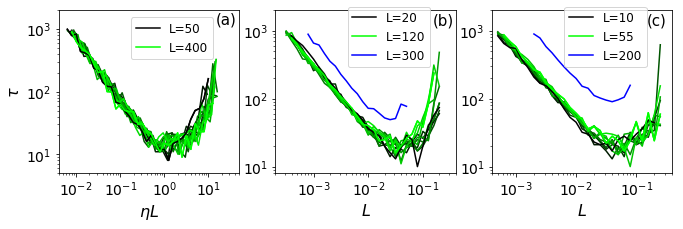

In [22]:
plt.figure(figsize=(11, 3))
gs = plt.GridSpec(1, 3)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

a1 = plt.subplot(gs[0, 0])
plt.ylim(5, 2000);   plt.xlim(0.004, 50) 
for i in range(15):
    len = 25*i+50
    plt.loglog(xis[i,0:int(count[i])]*len, yis[i,0:int(count[i])],color=[0,i/14,0])
    
plt.loglog(xis[0,0:int(count[0])]*50, yis[0,0:int(count[0])],color=[0,0,0],label='L=50')    
plt.loglog(xis[-1,0:int(count[-1])]*400, yis[-1,0:int(count[-1])],color=[0,1,0],label='L=400') 

plt.legend(loc=(0.40,0.7), fontsize=12)  
plt.xlabel('$\eta L$', fontsize=16); plt.ylabel(r'$\tau$', fontsize=16)
plt.grid(False)
plt.annotate('(a)', xy=(10, 1000), xytext=(15,1200),fontsize=15)


a2 = plt.subplot(gs[0, 1])
for i in range(1,11):
    len = 10*i+20
    plt.loglog(xis_r99[i,0:int(count_r99[i])], yis_r99[i,0:int(count_r99[i])],color=[0,i/10,0])
    
plt.loglog(xis_r99[0,0:int(count_r99[0])], yis_r99[0,0:int(count_r99[0])],color=[0,0,0],label='L=20')    
plt.loglog(xis_r99[-1,0:int(count_r99[-1])], yis_r99[-1,0:int(count_r99[-1])],color=[0,1,0],label='L=120')     
plt.loglog(lear_r99_200,step_r99_200,color='blue',label='L=300')
plt.annotate('(b)', xy=(0.1, 1000), xytext=(0.15,1200),fontsize=15)
plt.legend(loc=(0.40,0.65), fontsize=12)  
plt.xlim(0.0002, 0.4); plt.ylim(8, 2000)    
plt.grid(False); plt.xlabel('$L$', fontsize=16);


a3 = plt.subplot(gs[0, 2])
for i in range(1,10):
    len = 5*i+10
    plt.loglog(xis_r98[i,0:int(count_r98[i])], yis_r98[i,0:int(count_r98[i])],color=[0,i/9,0])
    
plt.loglog(xis_r98[0,0:int(count_r98[0])], yis_r98[0,0:int(count_r98[0])],color=[0,0,0],label='L=10')    
plt.loglog(xis_r98[-1,0:int(count_r98[-1])], yis_r98[-1,0:int(count_r98[-1])],color=[0,1,0],label='L=55')     
plt.loglog(lear_r98_90,step_r98_90,color='blue',label='L=200')


plt.legend(loc=(0.40,0.65), fontsize=12)  
plt.xlim(0.0004, 0.4); plt.ylim(8, 2000)   
plt.annotate('(c)', xy=(0.1, 1000), xytext=(0.15,1200),fontsize=15)
plt.xlabel('$L$', fontsize=16); plt.grid(False)

#savefig(os.path.join(figure_dir, "fig6_speed.pdf" ), bbox_inches='tight')